# 인공 신경망
   머신러닝은 특성을 feature로 뽑아내야한다 .. 예) 사과 .. 색 가로 세로 높이 무게  
   하지만 딥러닝은 이미지의 픽셀정보를 준다.

In [3]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
# 인공신경망을 구현하기위한 기본패키지
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 패션 MNIST

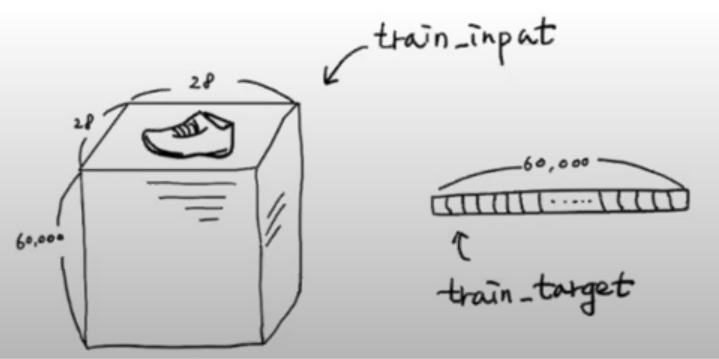
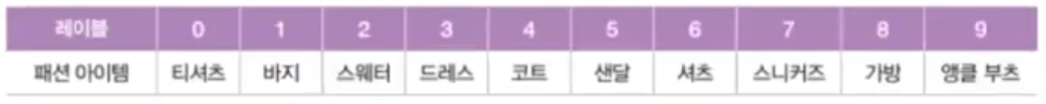

* train_input
    * 하나의 그림 픽셀은 28 x 28
    * 그림의 종류는 10개
    * 그림 데이터는 6만개

* train_target
    * train_input별 정답(Label,Target)

In [24]:
# 패션mnist 사용하려고
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [5]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [6]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


In [28]:
# train_target을 통해 그림의 순서를 유추할 수 있다.
train_target[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

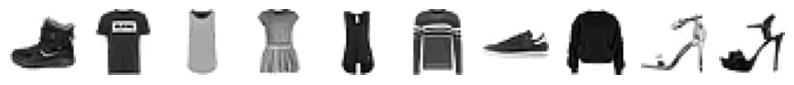

In [30]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    # imshow([이미지픽셀], cmap=[컬러톤])
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [8]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [9]:
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


## 로지스틱 회귀로 패션 아이템 분류하기

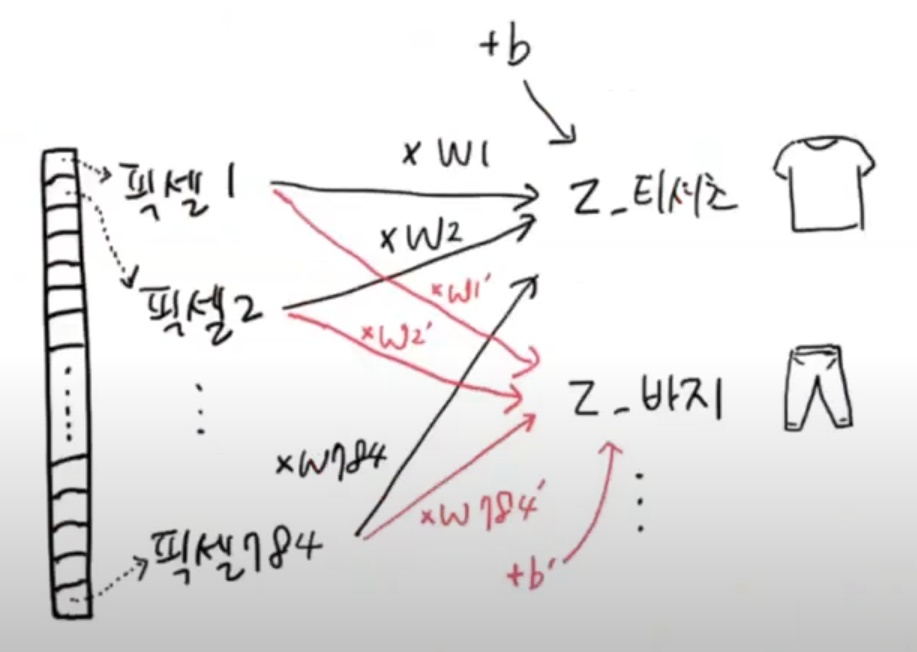

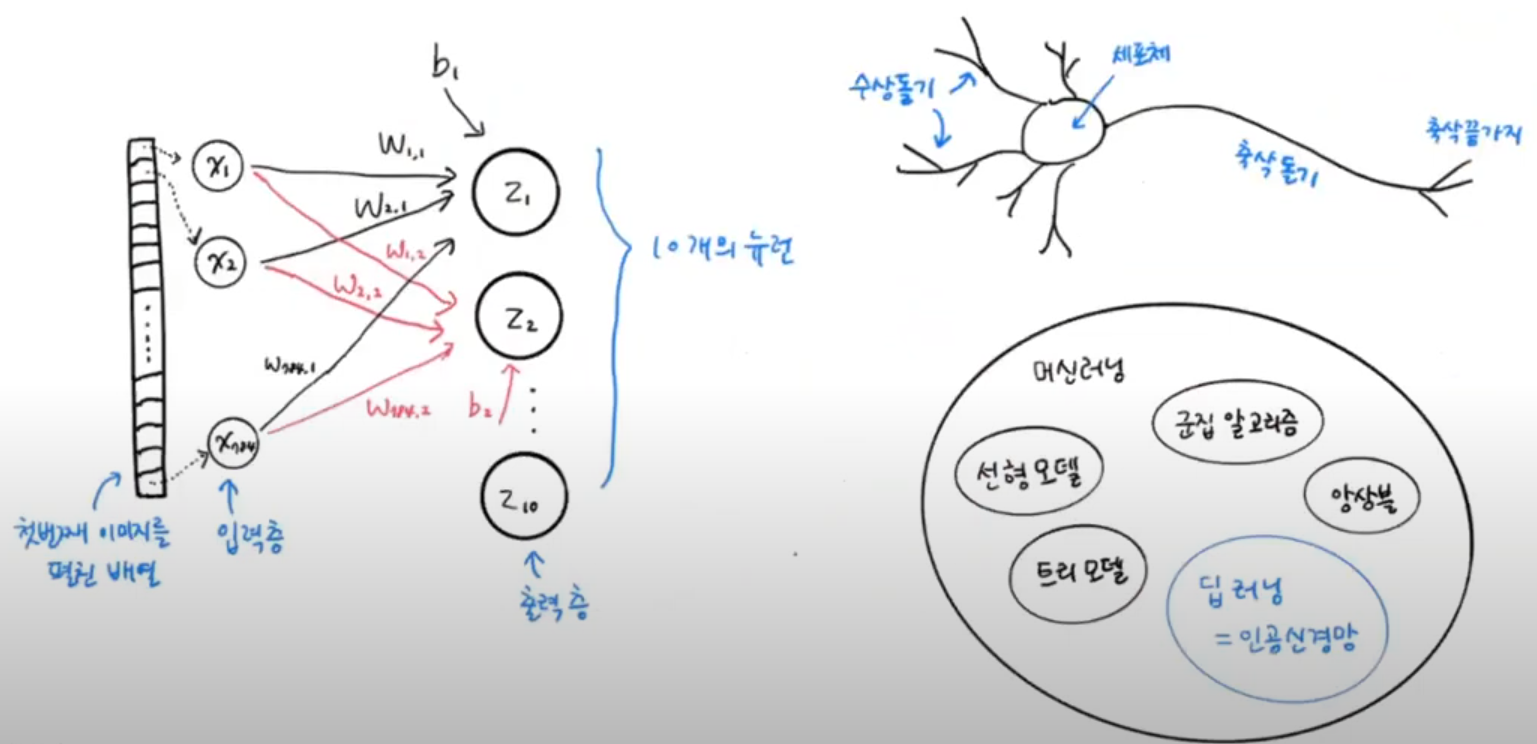

In [10]:
# 이미지 데이터는 표준화를 픽셀값으로 나누어 0~1 사이로 표현해도 무방하다.
train_scaled = train_input / 255.0
# 3차원 데이터를 2차원 데이터로 변환 (2차원 특성을 1차원 특성으로 변환)
train_scaled = train_scaled.reshape(-1, 28*28)

In [11]:
print(train_scaled.shape)

(60000, 784)


In [12]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

# 사이킷런 1.1 버전에서는 SGDClassifier의 loss 매개변수 중 
# 로지스틱 손실을 의미하는 'log'가 'log_loss'로 바뀐다는 경고가 발생합니다.
# 사이킷런 1.1 이상을 사용하는 경우 loss='log'를 loss='log_loss'로 변경하세요.
# 다중분류문제를 log의 조합으로 처리함
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8192833333333333


## 인공신경망

### 텐서플로와 케라스

In [13]:
import tensorflow as tf

In [14]:
from tensorflow import keras

## 인공신경망으로 모델 만들기

In [15]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [16]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [17]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [18]:
# 밀집층
# 다중 분류일때 사용하는 활성화함수 => softmax 함수
# 784개의 입력을 10개의 출력으로 처리
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [19]:
model = keras.Sequential(dense)

## 인공신경망으로 패션 아이템 분류하기

In [20]:
# 이진분류: binary_crossentropy
# 다중분류: categorical_crossentropy -> 타겟이 원핫 인코딩이 되어 있는 경우
#           sparse_categorial_crossentropy -> 다중 분류일 경우 타겟이 원핫 인코딩일 경우
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [21]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [22]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6069 - accuracy: 0.7947
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4742 - accuracy: 0.8382
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4508 - accuracy: 0.8474
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4367 - accuracy: 0.8527
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4280 - accuracy: 0.8555


In [23]:
model.evaluate(val_scaled, val_target)
# 손실(loss), 정답률(accuracy) 반환

375/375 [==============================] - 1s 1ms/step - loss: 0.4526 - accuracy: 0.8465


[0.45262545347213745, 0.8464999794960022]